1.What is Boosting in Machine Learning? Explain how it improves weak
learners.
- Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees with shallow depth) to form a strong learner with higher predictive accuracy.
- A weak learner is a model that performs slightly better than random guessing (e.g., 55%–60% accuracy).
Boosting improves performance by sequentially training weak models — each new model focuses more on the errors (misclassified samples) made by the previous ones.

2.What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
- AdaBoost works by sequentially training weak learners (usually shallow decision trees) and adjusting the weights of training samples after each iteration.
- AdaBoost improves performance by re-weighting the training data, focusing on difficult cases that earlier models got wrong. The process continues until a set number of learners are trained or the model’s performance stops improving.
- Gradient Boosting also builds models sequentially, but instead of re-weighting samples, it focuses on reducing the overall prediction error (residual) of the combined model.
- Gradient Boosting therefore uses the gradient of a loss function to determine how to correct the model’s errors at each step. This makes it a more general and flexible approach than AdaBoost, since it can work with many types of differentiable loss functions (like mean squared error, logistic loss, etc.).

3.How does regularization help in XGBoost?
- Regularization is a technique used to penalize model complexity — that is, to discourage the model from fitting too closely to the training data (which can harm performance on unseen data).
- Regularization is a technique used to penalize model complexity — that is, to discourage the model from fitting too closely to the training data (which can harm performance on unseen data).
4.Why is CatBoost considered efficient for handling categorical data?
- CatBoost (short for Categorical Boosting) is considered highly efficient for handling categorical data because it introduces innovative ways to encode and process categorical features, avoiding many of the pitfalls of traditional encoding methods.

5.What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting techniques — such as AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost — are often preferred over bagging methods (like Random Forests) in real-world scenarios where model accuracy, fine-grained patterns, and bias reduction are more important than simple variance reduction.

6.Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy


In [2]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 97.37%


7.Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score

In [3]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.8004


8.Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [4]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'learning_rate': 0.3}
Test Set Accuracy: 95.61%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:35:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9.Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

Model Accuracy: 96.49%


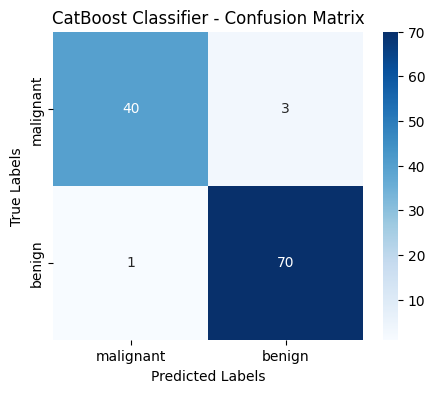

In [7]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("CatBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


10.You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

- Problem framing & data understanding

Confirm objective (binary: default = 1 / no default = 0), prediction horizon (e.g., 90 days past due), and available outcome timestamp (needed for time-aware splitting).
- Exploratory Data Analysis (EDA)

Class balance: measure default rate (e.g., 1–10% typical).

Missingness: per feature missing rate, missingness by class, whether missingness is informative.

- Feature engineering (recommended)

Aggregate transactions to customer level: total_txn_count, avg_txn_amount, max_txn_gap, delinquency_count, last_txn_days.

-Data preprocessing & missing / categorical handling

Split first (train/validation/test) before any target-based encodings or resampling. If data is temporal, use time-aware splits (train up to T, validate next window).

- Choice of boosting algorithm (AdaBoost vs XGBoost vs CatBoost)

CatBoost: first choice for this dataset if many categorical features and missing values. Pros: native categorical support (ordered target encoding → low leakage), robust missing handling, great default params, good for moderate data size.
- Model training strategy

Use stratified K-fold CV (e.g., 5 folds) for estimating generalization if data is iid. If time dependency exists, use time-based CV / rolling window CV.
- Hyperparameter tuning strategy

Stage 1 — coarse search: Randomized search or Bayesian optimization (e.g., Optuna) across a wide range to find regions of interest.

Stage 2 — refine: Grid search around the best region.Always use CV and early stopping to evaluate candidates. Tune on training folds only.
- Evaluation metrics (and why)

Because the dataset is imbalanced, accuracy is misleading. I recommend: